<a href="https://colab.research.google.com/github/Deepu-Pk/AI-lab/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

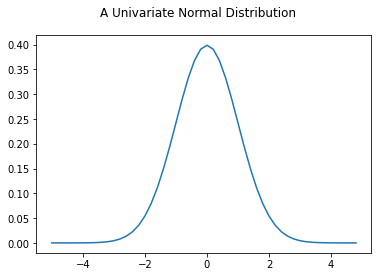

In [1]:
# plotting a Normal distribution PDF with mean=0 and standard deviation = 1. 50 points taken.
# for univariate normal distribution : [-5,5] with step 0.2 taken for x axis.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Plot between -5 and 5 with 0.2 steps amounting to 50 data points
x_axis = np.arange(-5, 5, 0.2)
# Mean = 0, SD = 2.
# norm.pdf(array, mean, std)
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.suptitle('A Univariate Normal Distribution')
plt.show()

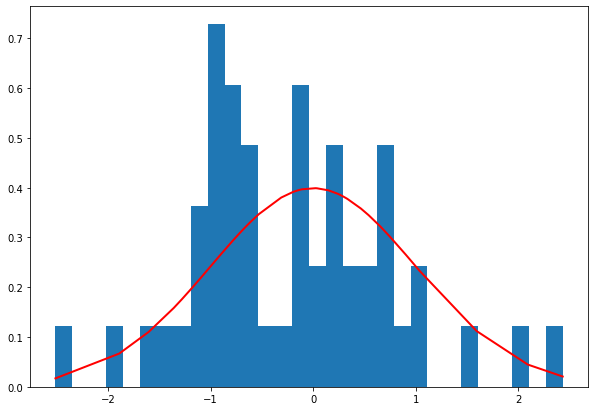

In [2]:
# Normal Distribution
# drawing i.i.d samples randomly from the normal distribution.
# defining a sample with 500 poplulation..
# samples taken random from this is to be used for all other purposes..
mu = 0
sigma = 1
parentDatapoints  = np.random.normal(mu, sigma, 500).tolist()
# datapoints = np.random.normal(mu, sigma, 50)
datapoints = np.asarray(random.sample(parentDatapoints, 50))
#defining the size of the figure.
figure, ax = plt.subplots(1, figsize=(10,7))
# for plotting the histogram and making use of the bins for plotting normal 
#distribution.
count, bins, ignored = plt.hist(datapoints,30, density=True)
# scipy's norm function can also be used inplace of this equation.
ax.plot(np.sort(datapoints), 
        1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (np.sort(datapoints) - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.show()

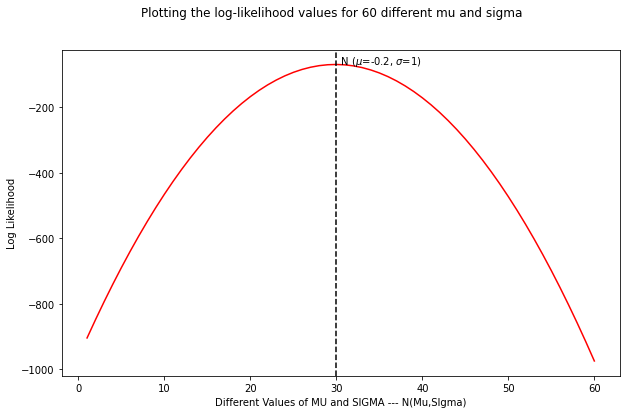

In [3]:
# plotting Log likelihood values for different mu and sigma.. 
# for the same datapoints obatined above
# This can also be used inplace of above function.
# This is the better alternative.
def LogLikelihoodFunction( mu, sigma, data):
 value = np.sum(np.log(norm.pdf(data, mu, sigma)))
 return value
mu1 = np.array([-2,-.8,-1,0,1.1,1.5, 1, 2])
sigma1 = np.array([2,2,1,1,1.1,1.6, 1.2, 1])
LogLikelihood=[] # defining a empty list for storing log likelihood
# calulating the log likelihood values of above mu1 and sigma1 for analysis
for i in range(len(mu1)):
  LogLikelihood.append(LogLikelihoodFunction(mu1[i], sigma1[i], datapoints))



# Likelihood for a big array of samples as shown below
mu2 = np.arange(-6, 6, 0.2)
# Taking random values between o and 5 which has the same length as mu2 array
sigma2 = []
for i in range(len(mu2)):
  sigma2.append(1)
# creating a list containing all the likelihood valus from above mu2 and sigma2
LogLikelihood2 = []
for i in range(len(mu2)):
  LogLikelihood2.append(LogLikelihoodFunction(mu2[i], sigma2[i], datapoints))
fig,ax = plt.subplots(1,figsize=(10,6))
# plotting the log-likelihood values obtained above
ax.plot(np.arange(1, len(mu2)+1, 1), LogLikelihood2,c="r", 
        label="mu vs likelihood")
# doing the annotation for arg max only 
max = np.argmax(LogLikelihood2)
ax.annotate("    N ($\mu$={}, $\sigma$={}) ".format(np.round(mu2[max],3),sigma2[max]),(max, LogLikelihood2[max]), c='black', )
plt.xlabel("Different Values of MU and SIGMA --- N(Mu,SIgma)")
plt.ylabel("Log Likelihood")
# to find which observation has the maximum log-likelihood value.
plt.axvline(max + 1, ls='--', c='black')
# np.argmax() returns the index of the value which is the highest in the list
fig.suptitle("Plotting the log-likelihood values for {} different mu and sigma".format(len(mu2)))
plt.show()

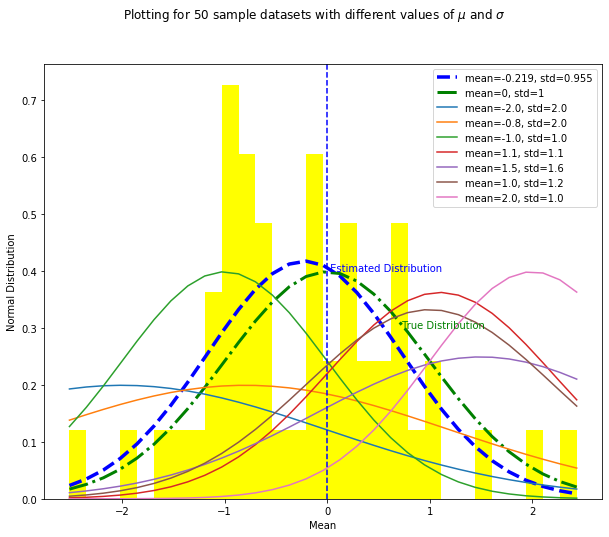

In [4]:
figure, ax = plt.subplots(1, figsize=(10,8))
count, bins, ignored = ax.hist(datapoints,30, density=True, color='yellow')
# we already proved that Maximum-Likelihood Estimate of mu is the mean of 
# the measurements and for sigma = standard deviation.
estimated_mu = np.mean(datapoints)
estimated_sigma= np.std(datapoints)
# plotting the PDF of Estimated Distribution.
ax.plot(bins, norm.pdf(bins,estimated_mu,estimated_sigma),'--', lw=3.5,c='b',label='mean={}, std={}'.format(round(np.mean(datapoints), 3),round(np.std(datapoints),3)))
ax.annotate(" Estimated Distribution", (0,0.4), c='b')
# plotting the PDF of True Distribution
ax.plot(bins, norm.pdf(bins,0,1),'-.', lw=3,color='green',label='mean={}, std={}'.format(0,1))
ax.annotate(" True Distribution", (0.7,0.3), c='g')
# plotting the PDF of all the tested mu and std values.
for i in range(len(mu1)):
  if mu1[i]!= 0 or sigma1[i]!= 1:
    # print(mu1[i])
    ax.plot(bins, norm.pdf(bins,mu1[i],sigma1[i]),label='mean={}, std={}'.format(mu1[i], sigma1[i]))
ax.legend() # to show the legend
plt.axvline(0, ls='--', c='b') # for the vertical line passing through origin
plt.xlabel("Mean")
plt.ylabel("Normal Distribution")
figure.suptitle("Plotting for 50 sample datasets with different values of $\mu$ and $\sigma$")
plt.show()

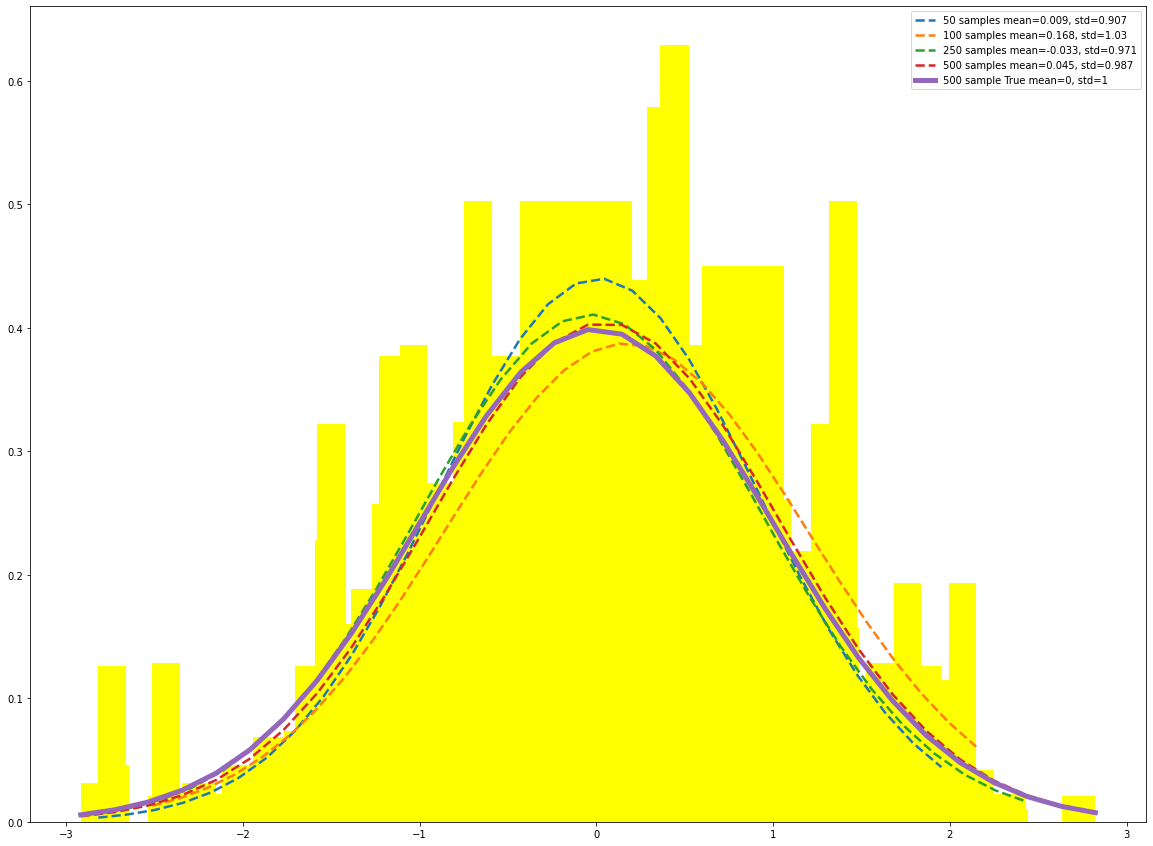

In [5]:
#Plotting the true and estimated distributions with increasing number of samples.
fig = plt.figure(figsize=(20,15))
mu = 0
sigma = 1
# 4 arrays containing datapoints from a normal distribution
datapoints1 =np.asarray(random.sample(parentDatapoints, 50))
datapoints2 = np.asarray(random.sample(parentDatapoints, 100))
datapoints3 = np.asarray(random.sample(parentDatapoints, 250))
datapoints4 = np.asarray(random.sample(parentDatapoints, 500))
# bins and hists for 4 arrays 
count1, bins1, ignored1 = plt.hist(datapoints1,30, density=True, color='yellow')
count2, bins2, ignored2 = plt.hist(datapoints2,30, density=True, color='yellow')
count3, bins3, ignored3 = plt.hist(datapoints3,30, density=True, color='yellow')
count4, bins4, ignored4 = plt.hist(datapoints4,30, density=True, color='yellow')
# estimating mu and sigma for each array of samples
estimated_mu1 = np.mean(datapoints1)
estimated_sigma1= np.std(datapoints1)
estimated_mu2 = np.mean(datapoints2)
estimated_sigma2= np.std(datapoints2)
estimated_mu3 = np.mean(datapoints3)
estimated_sigma3= np.std(datapoints3)
estimated_mu4 = np.mean(datapoints4)
estimated_sigma4= np.std(datapoints4)

# PLOTTING
# plotting the PDF of Estimated Distribution for subplot 1
plt.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,label='50 samples mean={}, std={}'.format(round(np.mean(datapoints1), 3),round(np.std(datapoints1),3)))
 # plotting the PDF of True Distribution for subplot 1
# plt.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,
#            label='50 samples true mean=0, std=1')
# plt.title.set_text('50 Samples')
plt.legend()
# plotting the PDF of Estimated Distribution for subplot 2
plt.plot(bins2, norm.pdf(bins2,estimated_mu2,estimated_sigma2),'--', lw=2.5,
           label='100 samples mean={}, std={}'.format(round(np.mean(datapoints2), 3),
                                          round(np.std(datapoints2),3)))
plt.legend()
# plotting the PDF of Estimated Distribution for subplot 3
plt.plot(bins3, norm.pdf(bins3,estimated_mu3,estimated_sigma3),'--', lw=2.5,
           label='250 samples mean={}, std={}'.format(round(np.mean(datapoints3), 3),
                                          round(np.std(datapoints3),3)))
plt.legend()
# plotting the PDF of Estimated Distribution for subplot 4
plt.plot(bins4, norm.pdf(bins4,estimated_mu4,estimated_sigma4),'--', lw=2.5,
           label='500 samples mean={}, std={}'.format(round(np.mean(datapoints4), 3),
                                          round(np.std(datapoints4),3)))
# plotting the PDF of True Distribution for subplot 4.
plt.plot(bins4, norm.pdf(bins4,0,1), lw=5,
           label='500 sample True mean=0, std=1')
# plt.title.set_text('500 Samples')
plt.legend()
plt.show()

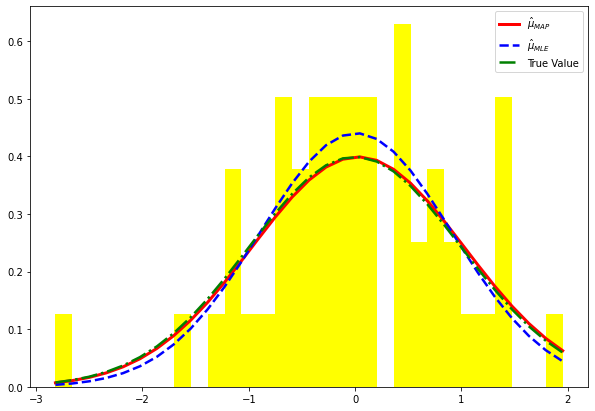

In [6]:
# taking the same samples  which MLE was trained On.
# Implementing a function which  returns the
# MAP estimate of the parameters given the data and the prior probability 
# parameters
sigma_squared = 1 # setting variance of sample to 1
# DEFINING FUNCTION FOR MAP ESTIMATION
def MAP_Estimate(data, prior_nu, prior_beta_squared):
  n = len(data) # no of samples
  X_bar = np.mean(data) # measured mean of samples
# numerator of equation (1) in above derivation
  numerator =  sigma_squared * prior_nu + n * prior_beta_squared * X_bar
# denomenator  
  denomenator = sigma_squared + n * prior_beta_squared
  # returns the MAP of mu
  return numerator / denomenator
# logLikelihoodfunction already defined
# MAP_estimated_values for 50, 100, 250, 500 samples
map_estimate_50_samples = MAP_Estimate(datapoints1, .5, .5)
map_estimate_100_samples = MAP_Estimate(datapoints2, .5, .5)
map_estimate_250_samples = MAP_Estimate(datapoints3, .5, .5)
map_estimate_500_samples = MAP_Estimate(datapoints4, .5, .5)
# plotting likelihood, prior and MAP estimate next to each other
figure, ax = plt.subplots(1, figsize=(10,7))
count, bins1, ignored = plt.hist(datapoints1,30, density=True, color = 'yellow')
# scipy's norm function can also be used inplace of this equation.
ax.plot(bins1,norm.pdf(bins1, map_estimate_50_samples , sigma_squared) ,
        linewidth=3, color='r', label = '$\hat{\mu}_{MAP}$ ')
ax.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')
ax.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2.5,c='g',
           label='True Value')
plt.legend()
ax.plot()
plt.show()

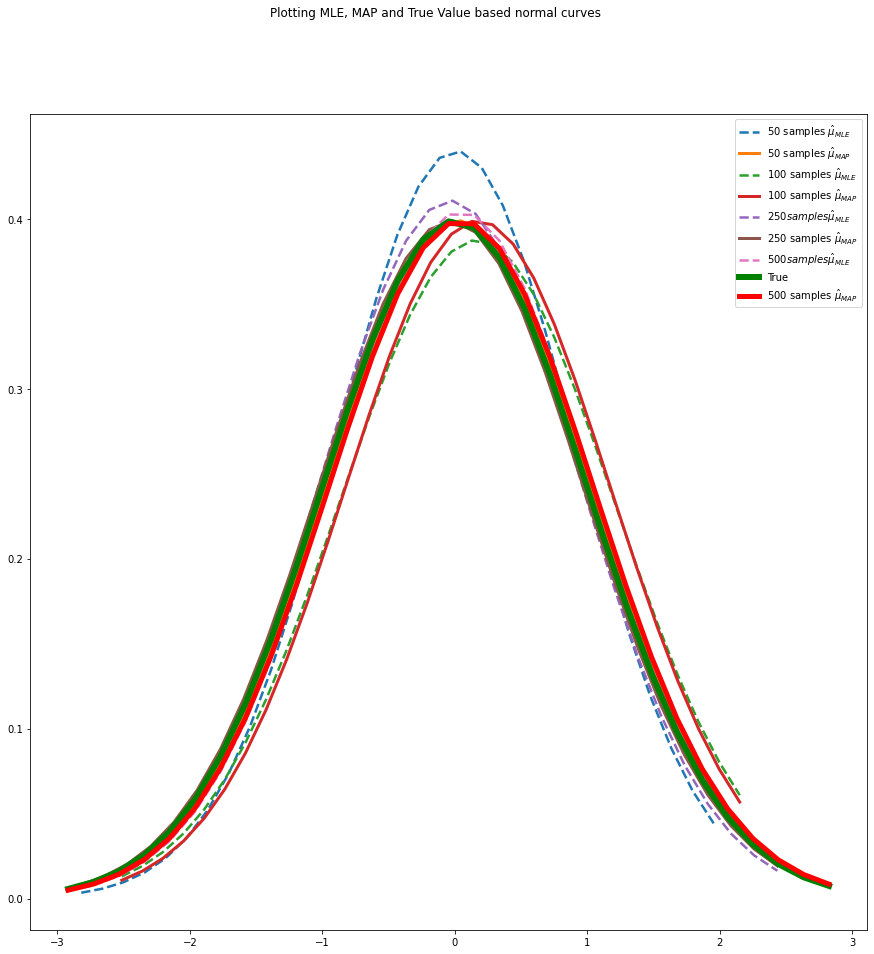

In [7]:
# Examining the behavior of the MAP estimate compared with the MLE estimate and
# the prior

# 1. repeatedly sampling the dataset and observing the variations in the estimate

# for this we use datapoints1, datapoints2, etc.,

fig = plt.figure(figsize=(15,15))

fig.suptitle('Plotting MLE, MAP and True Value based normal curves')
# PLOTTING
# plotting the PDF of Estimated Distribution for subplot 1
plt.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,
           label='50 samples $\hat{\mu}_{MLE}$')
# plotting the PDF of True Distribution for subplot 1
# ax1.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
#            label='True')

# plotting the PDF of MAP for subplot 1.
plt.plot(bins1,norm.pdf(bins1, map_estimate_50_samples , sigma_squared) ,
        linewidth=3, label = '50 samples $\hat{\mu}_{MAP}$ ')
# ax1.title.set_text('50 Samples')
plt.legend()
# plotting the PDF of Estimated Distribution for subplot 2
plt.plot(bins2, norm.pdf(bins2,estimated_mu2,estimated_sigma2),'--', lw=2.5,
           label='100 samples $\hat{\mu}_{MLE}$ ')
# # plotting the PDF of True Distribution for subplot 2
# plt.plot(bins2, norm.pdf(bins2,0,1),'-.', lw=2,c='r',
#            label='True')
# plotting the PDF of MAP for subplot 2.
plt.plot(bins2,norm.pdf(bins2, map_estimate_100_samples , sigma_squared) ,
        linewidth=3, label = '100 samples $\hat{\mu}_{MAP}$ ')
# plt.title.set_text('100 Samples')
plt.legend()
# plotting the PDF of Estimated Distribution for subplot 3
plt.plot(bins3, norm.pdf(bins3,estimated_mu3,estimated_sigma3),'--', lw=2.5,
           label='$250 samples \hat{\mu}_{MLE}$ ')

# # plotting the PDF of True Distribution for subplot 3
# plt.plot(bins3, norm.pdf(bins3,0,1),'-.', lw=2,c='r',
#            label='True')
# plotting the PDF of MAP for subplot 2.
plt.plot(bins3,norm.pdf(bins3, map_estimate_250_samples , sigma_squared) ,
        linewidth=3, label = '250 samples $\hat{\mu}_{MAP}$ ')
# plt.title.set_text('250 Samples')
plt.legend()
# plotting the PDF of Estimated Distribution for subplot 4
plt.plot(bins4, norm.pdf(bins4,estimated_mu4,estimated_sigma4),'--', lw=2.5,
           label='$ 500 samples \hat{\mu}_{MLE}$')
# plotting the PDF of True Distribution for subplot 4.
plt.plot(bins4, norm.pdf(bins4,0,1), lw=6,c = 'g',
           label='True')
# plotting the PDF of MAP for subplot 4.
plt.plot(bins4,norm.pdf(bins4, map_estimate_500_samples , sigma_squared) ,
        linewidth=5,c = 'r' ,label = '500 samples $\hat{\mu}_{MAP}$ ')
# plt.title.set_text('500 Samples')
plt.legend()
plt.show()

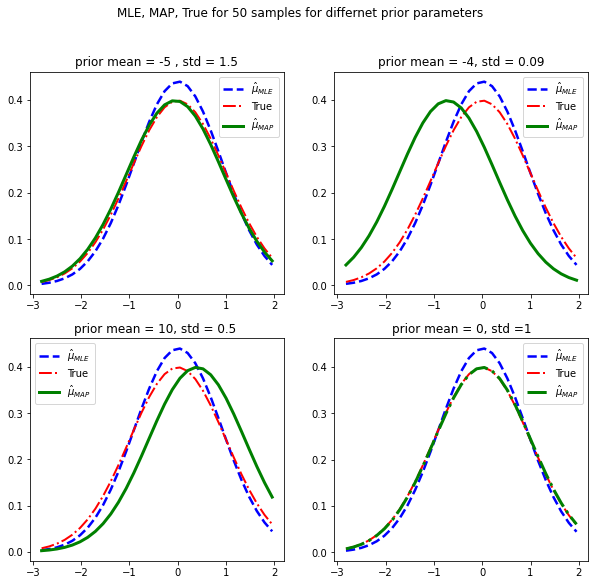

In [8]:
# Changing the prior parameters to see their effect on the estimate
# MAP_estimated_values on 50 samples and different prior parameters
# using MAP_Estimate(data, prior_nu, prior_beta_squared)
map_estimate_50_samples1 = MAP_Estimate(datapoints1, -5,1.5 )
map_estimate_50_samples2 = MAP_Estimate(datapoints1, -4, .09)
map_estimate_50_samples3 = MAP_Estimate(datapoints1, +10, .5)
map_estimate_50_samples4 = MAP_Estimate(datapoints1, 0, 1)
fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
fig.suptitle('MLE, MAP, True for 50 samples for differnet prior parameters')
# PLOTTING
# plotting the PDF of Estimated Distribution for subplot 1
ax1.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')
# plotting the PDF of True Distribution for subplot 1
ax1.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')
# plotting the PDF of MAP for subplot 1.
ax1.plot(bins1,norm.pdf(bins1, map_estimate_50_samples1 , sigma_squared) ,
        linewidth=3, color='g', label = '$\hat{\mu}_{MAP}$ ')
ax1.title.set_text('prior mean = -5 , std = 1.5')
ax1.legend()
# plotting the PDF of Estimated Distribution for subplot 2
ax2.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')
# plotting the PDF of True Distribution for subplot 2
ax2.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')
# plotting the PDF of MAP for subplot 2
ax2.plot(bins1,norm.pdf(bins1, map_estimate_50_samples2 , sigma_squared) ,
        linewidth=3, color='g', label = '$\hat{\mu}_{MAP}$ ')
ax2.title.set_text('prior mean = -4, std = 0.09')
ax2.legend()

# plotting the PDF of Estimated Distribution for subplot 3
ax3.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')
# plotting the PDF of True Distribution for subplot 3
ax3.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')
# plotting the PDF of MAP for subplot 3
ax3.plot(bins1,norm.pdf(bins1, map_estimate_50_samples3 , sigma_squared) ,
        linewidth=3, color='g', label = '$\hat{\mu}_{MAP}$ ')
ax3.title.set_text('prior mean = 10, std = 0.5 ')
ax3.legend()
# plotting the PDF of Estimated Distribution for subplot 4
ax4.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',
           label='$\hat{\mu}_{MLE}$')
# plotting the PDF of True Distribution for subplot 4
ax4.plot(bins1, norm.pdf(bins1,0,1),'-.', lw=2,c='r',
           label='True')
# plotting the PDF of MAP for subplot 4
ax4.plot(bins1,norm.pdf(bins1, map_estimate_50_samples4 , sigma_squared) ,
        linewidth=3, color='g', ls='-.', label = '$\hat{\mu}_{MAP}$ ')
ax4.title.set_text('prior mean = 0, std =1')
ax4.legend()
plt.show()